In [1]:
import numpy as np
import pandas as pd
from larcv import larcv
import math
import matplotlib.pyplot as plt
%matplotlib inline

Number of events:
	 nue: 302
	 numu: 34657
	 nc: 10103


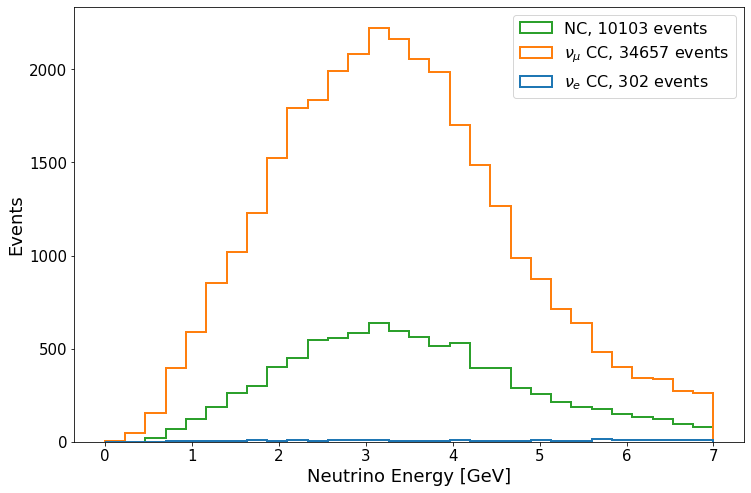

In [19]:
filename = '/Users/mdeltutt/Downloads/inference_beam_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr.h5'

io = larcv.IOManager()
io.add_in_file(filename)
io.initialize()

nue_energy = []
numu_energy = []
nc_energy = []

for i in range(io.get_n_entries()):
        
    io.read_entry(i)
    
    mc_neutrino = larcv.EventParticle.to_particle(io.get_data("particle", "neutrino"))
    mc_neutrino = mc_neutrino.as_vector()[0]
    
    if mc_neutrino.nu_current_type() == 0:
        if mc_neutrino.pdg_code() == 12:
            nue_energy.append(mc_neutrino.p())
        if mc_neutrino.pdg_code() == 14:
            numu_energy.append(mc_neutrino.p())
    else:
        nc_energy.append(mc_neutrino.p())

        
print ('Number of events:')
print ('\t nue:', len(nue_energy))
print ('\t numu:', len(numu_energy))
print ('\t nc:', len(nc_energy))
fig = plt.figure(figsize=(12,8),facecolor='w')
plt.hist([nue_energy, numu_energy, nc_energy], histtype='step', lw=2, bins=30, 
         label=[r'$\nu_e$ CC, '+str(len(nue_energy))+' events', 
                r'$\nu_\mu$ CC, '+str(len(numu_energy))+' events', 
                r'NC, '+str(len(nc_energy))+' events'], range=[0,7])

plt.legend(fontsize=16, loc='best')
plt.ylabel('Events',fontsize=18)
plt.xlabel('Neutrino Energy [GeV]',fontsize=18)
# plt.title('SBND Sparse Data', loc='right', fontsize=14)
plt.tick_params(labelsize=15)

plt.savefig('flux.pdf')
plt.show()